In [1]:
import nibabel as nib
import pydicom
import os
import numpy as np
import matplotlib.pyplot as plt

Note: Each `.nii` file consists of the entire 4D data, but for `.dcm`, each file consists only of each slice

#### 1. NIfTI Data

In [2]:
path = '.\sample_data\sub-62038_ses-1_acq-t1csmp2ragesag06mmUNIDEN_T1w.nii'
img = nib.load(path)
data = img.get_fdata()

In [3]:
print(data.shape)
# (saggital, coronal, axial)

(256, 362, 384)


In [4]:
# metadata
print(img.shape)
print(img.affine)
print(img.header)

(256, 362, 384)
[[ 6.29074156e-01 -1.33072212e-02 -3.11387163e-02 -7.36054077e+01]
 [ 1.63442213e-02  6.21981978e-01  5.91654330e-02 -1.00073349e+02]
 [ 2.99664345e-02 -5.98863661e-02  6.21413589e-01 -1.19990189e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 256 362 384   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.    0.63  0.625 0.625 6.    0.    0.    0.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax        

In [5]:
# static visualisation
def show_slices(data, title=''):
    axial = data[:, :, data.shape[2] // 2]  # displaying mid-slice of each view
    coronal = data[:, data.shape[1] // 2, :]
    sagittal = data[data.shape[0] // 2, :, :]

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for ax, img, title_ in zip(axes, [axial, coronal, sagittal], ['Axial', 'Coronal', 'Sagittal']):
        ax.imshow(np.rot90(img), cmap='gray')
        ax.set_title(f'{title} {title_}')
        ax.axis('off')
    plt.show()

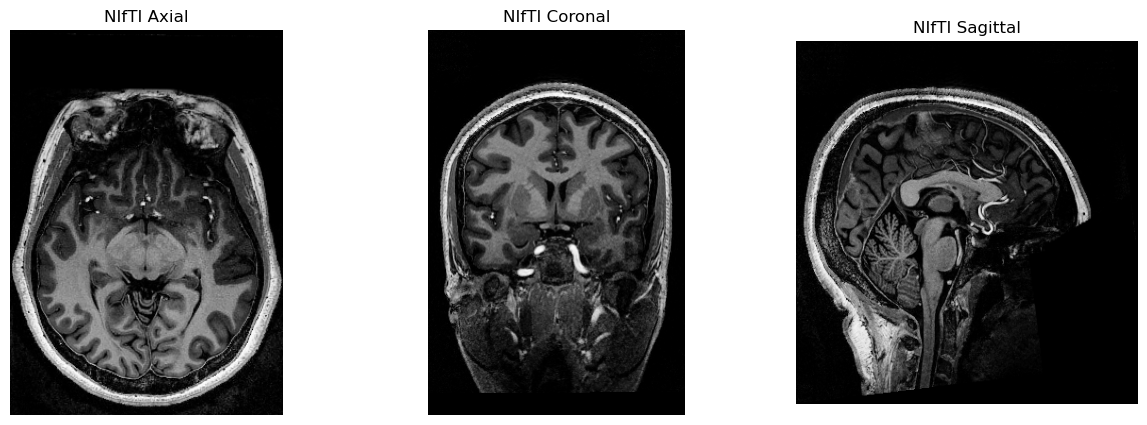

In [6]:
show_slices(data, title='NIfTI')

In [7]:
# interactive slider 
# conda install ipywidgets
import ipywidgets as widgets
from IPython.display import display, clear_output
%matplotlib inline

In [ ]:
view_buttons = widgets.ToggleButtons(
    options=['Axial', 'Coronal', 'Sagittal'],
    description='View:'
)

def get_max_index(view):
    if view == 'Axial':
        return data.shape[2] - 1
    elif view == 'Coronal':
        return data.shape[1] - 1
    elif view == 'Sagittal':
        return data.shape[0] - 1


slice_slider = widgets.IntSlider(
    min=0,
    max=get_max_index('Axial'), # just for default
    step=1,
    value=get_max_index('Axial') // 2,
    description='Slice: ',
    continuous_update=True      # changes irl
)


def on_view_change(change):
    new_view = change['new']    # ?
    slice_slider.max = get_max_index(new_view)
    slice_slider.value = slice_slider.max // 2  # Reset to middle slice

view_buttons.observe(on_view_change, names='value')


def plot_slice_inline(view, index):
    plt.figure(figsize=(5, 5))

    if view == 'Axial':
        plt.imshow(np.rot90(data[:, :, index], 1), cmap='gray')
        plt.title(f'Axial slice {index}')
    elif view == 'Coronal':
        plt.imshow(np.rot90(data[:, index, :], 1), cmap='gray')
        plt.title(f'Coronal slice {index}')
    elif view == 'Sagittal':
        plt.imshow(np.rot90(data[index, :, :], 1), cmap='gray')
        plt.title(f'Sagittal slice {index}')

    plt.axis('off')
    plt.show()

# Interactive display
ui = widgets.VBox([view_buttons, slice_slider])
out = widgets.interactive_output(plot_slice_inline, {'view': view_buttons, 'index': slice_slider})

display(ui, out)


Output()

See Sagittal slice 227 for insane jawline 🥵

#### 2. DICOM Data

In [ ]:
# Data taken from https://www.kaggle.com/datasets/trainingdatapro/dicom-brain-dataset
path = '.\sample_data\dicom_data\SE000002'  # I'm using only the folder that has the most .dcm files in it

files = os.listdir(path)    # contains both .jpg and .dcm files

slices = [pydicom.dcmread(os.path.join(path, file)) for file in files if file.endswith('.dcm')]   # ***IMP: if in list comprehension

In [ ]:
len(slices) # 125 slices

125

In [ ]:
# checking metadata for one slice
sample_slice = slices[0]
print(sample_slice.Modality)   # 'MR' signifies MRI scan
print(sample_slice.PatientName)
print(sample_slice.InstanceNumber)  # order of the slice wrt all the slices #?: Why is it 4?
print(sample_slice.SliceThickness)  # in mm

MR
Anonymous
4
5


In [42]:
# stacking multiple slices to form a volume
volume = []

for slice in slices:
    volume.append(slice.pixel_array)

volume = np.array(volume)
volume.shape    # currently: (125, 288, 288)

# converting to (saggital, coronal, axial)
volume = np.transpose(volume, (2, 1, 0))
volume.shape

(288, 288, 125)

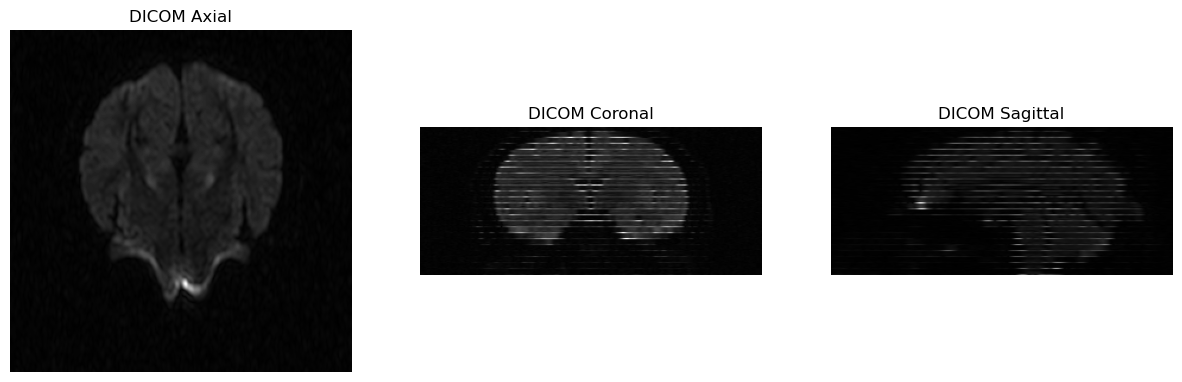

In [ ]:
# visualising the data
show_slices(volume, title='DICOM')
# WHY does it have so much blurring??

#### Extra: Animate

In [45]:
import matplotlib.animation as animation

In [57]:
path = '.\sample_data\sub-65304_ses-1_acq-t1csmp2ragesag06mmUNIDEN_T1w.nii'
img = nib.load(path)
data = img.get_fdata()

In [ ]:
slices = data.shape[2]  # Adjust for cor and sag
fig, ax = plt.subplots()

vmin = np.percentile(data, 1)
vmax = np.percentile(data, 99)
# Initialize the plot
im = ax.imshow(np.rot90(data[:, :, 0], 1), cmap='gray', animated=True, vmin=vmin, vmax=vmax)
ax.axis('off')
ax.set_title("Axial Slice Animation")

# Animation update function
def update(i):
    im.set_array(np.rot90(data[:, :, i], 1))
    return [im]

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=slices, interval=10, blit=True)

# Save as GIF
ani.save('nii_ani_test.gif', writer='pillow', fps=500)

plt.close()